# Example of the aitlas toolbox in the context of object detection in remote sensing images

## Import the required packages

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from aitlas.datasets import ObjectDetectionRfiCocoDataset 
from aitlas.transforms import Resize
from aitlas.utils import image_loader
from aitlas.models import FasterRCNN

## Visualize images and objects with bounding boxes

Total number of patches: 3940


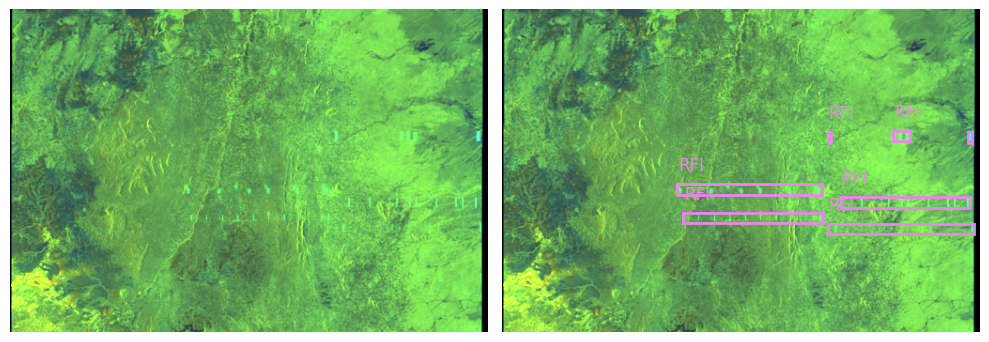

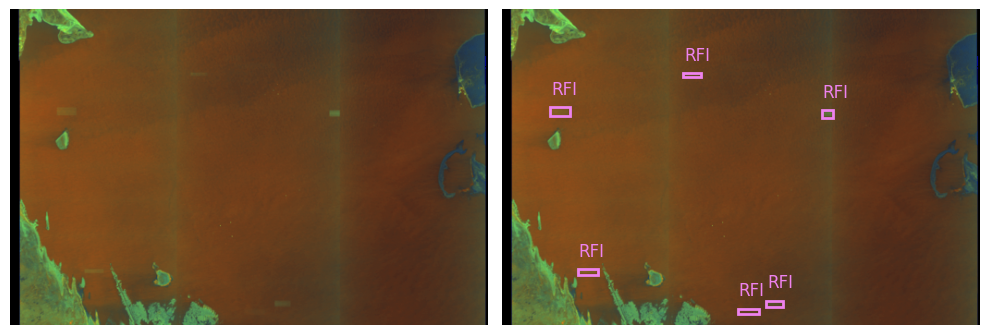

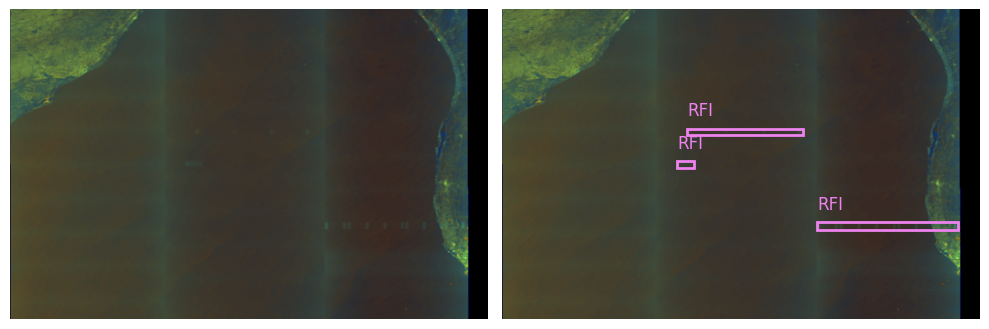

In [15]:
dataset_config = {
    "data_dir": "/home/dragik/data/rfi/rfi_quick_looks/",
    "annotation_dir": "/home/dragik/data/rfi/COCO/",
}
dataset = ObjectDetectionRfiCocoDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(0);
dataset.show_image(800);
dataset.show_image(1200);

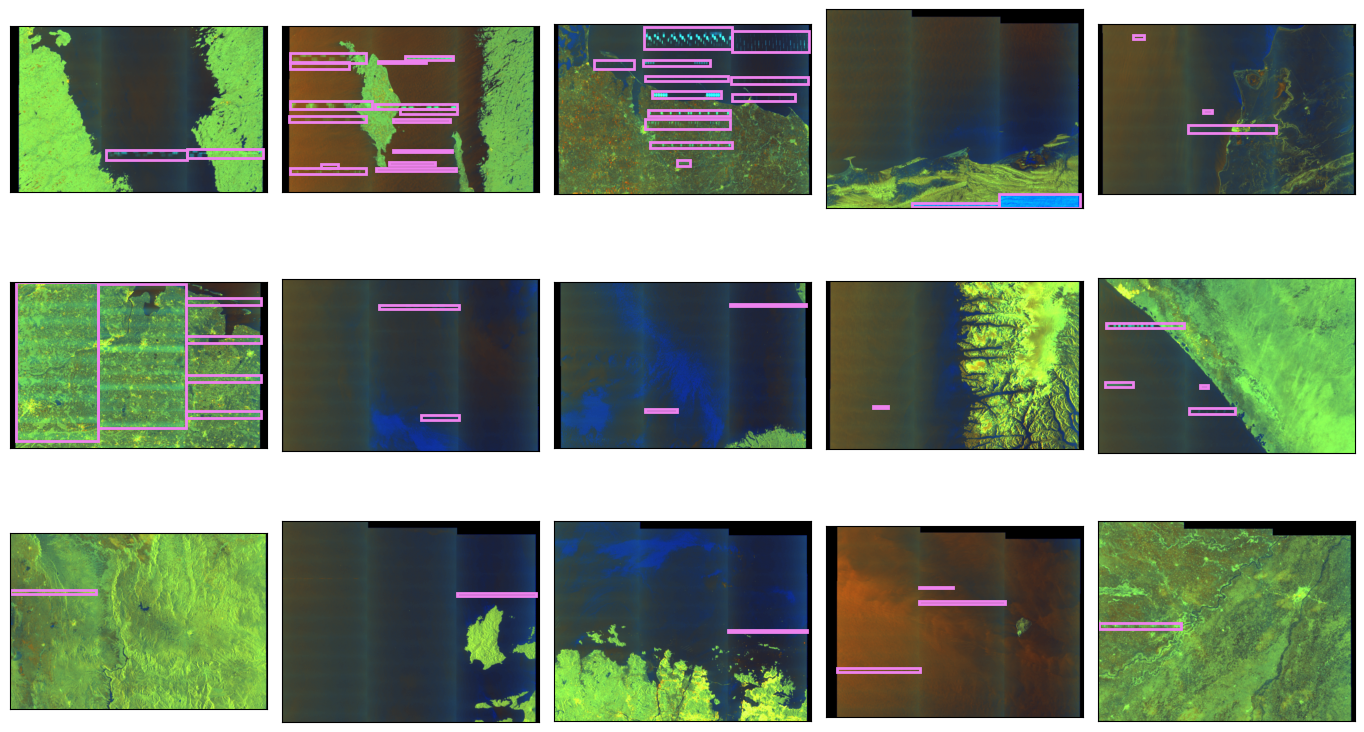

In [6]:
dataset.show_batch(15);

In [16]:
dataset.data_distribution_table()

,Label,Count
0,RFI,11724
1,Other Anomaly,301


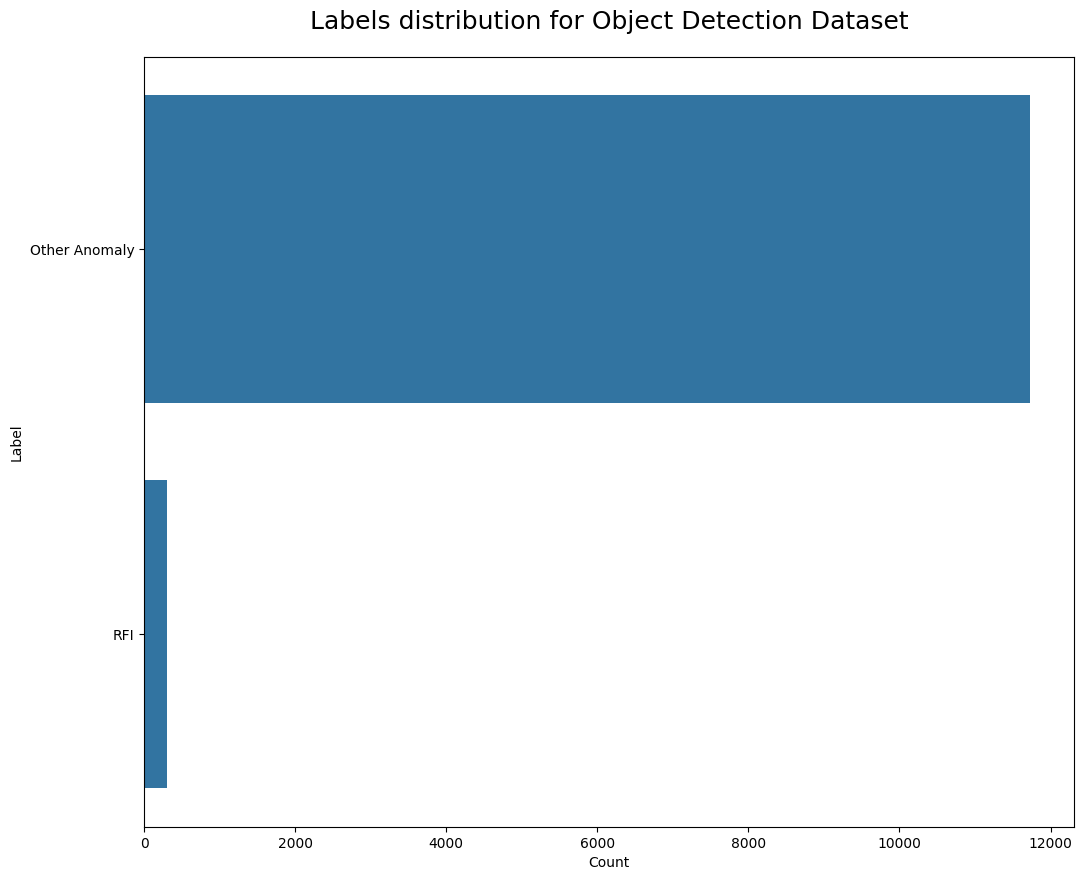

In [8]:
dataset.data_distribution_barchart();

## Distribution of the bounding box areas

In [9]:
dataset_config = {
    "data_dir": "/home/dragik/data/rfi/rfi_quick_looks/",
    "annotation_dir": "/home/dragik/data/rfi/COCO/",
}
dataset = ObjectDetectionRfiCocoDataset(dataset_config)

areas = []
for i in np.arange(len(dataset)):
    area_per_image = (dataset[i][1]["area"]).tolist()
    areas = areas + area_per_image

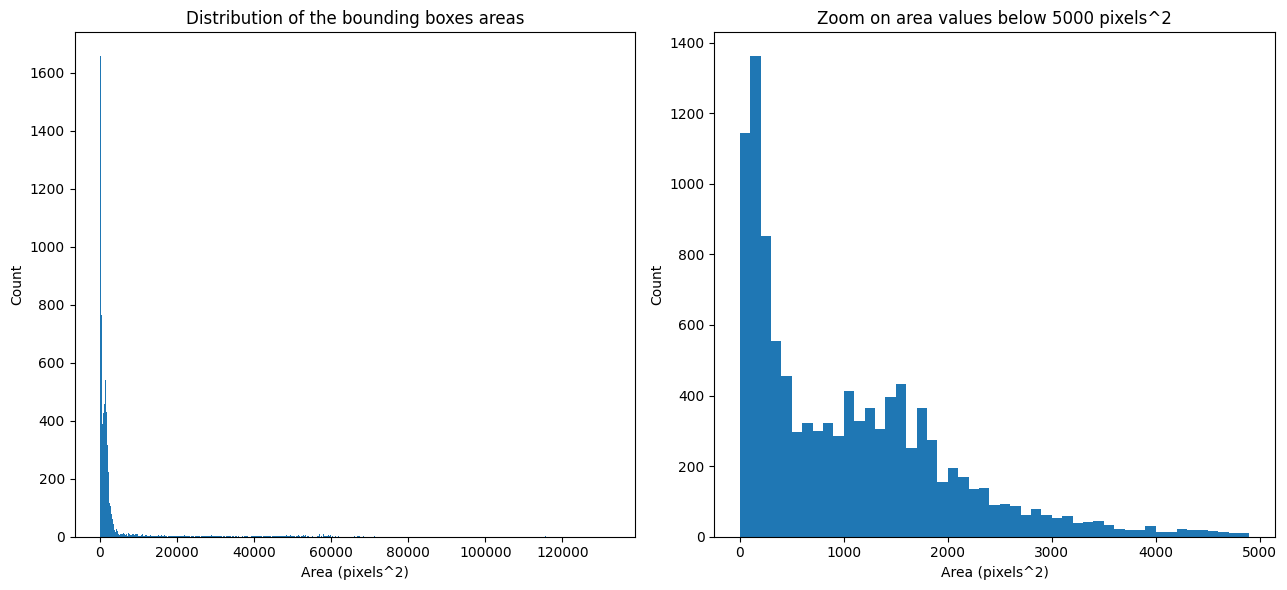

In [10]:
import numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,2, figsize = (13, 6))

ax[0].hist(areas, bins=1000, alpha=1)
ax[0].set_title('Distribution of the bounding boxes areas')
ax[0].set_xlabel('Area (pixels^2)')
ax[0].set_ylabel('Count')

ax[1].hist(areas, bins=np.arange(0,5000,100), alpha=1)
ax[1].set_title('Zoom on area values below 5000 pixels^2')
ax[1].set_xlabel('Area (pixels^2)')
ax[1].set_ylabel('Count')

fig.tight_layout()
plt.show()

## Load training data

In [9]:
train_dataset_config = {
    "batch_size": 8,
    "shuffle": True,
    "data_dir": "/home/dragik/data/rfi/training/images/",
    "annotation_dir": "/home/dragik/data/rfi/training/labels/COCO/",
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]
}
train_dataset = ObjectDetectionRfiCocoDataset(train_dataset_config)

print(f"Total number of train images: {len(train_dataset)}")

Total number of train images: 3154


## Create the model

In [10]:
epochs = 10
model_directory = "/home/dragik/data/rfi/experiments/coco/"
model_config = {
    "num_classes": 2,
    "learning_rate": 0.0001,
    "pretrained": True,
    "metrics": ["map"]
}

model = FasterRCNN(model_config)
model.prepare()

## Start the training

In [11]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

2024-09-11 12:39:39,162 INFO Starting training.
training: 100%|███████████████████████████████████████████████████████████████████████| 395/395 [02:13<00:00,  2.97it/s]
2024-09-11 12:41:52,383 INFO epoch: 1, time: 133, loss:  0.22153
testing on train set: 100%|███████████████████████████████████████████████████████████| 395/395 [01:07<00:00,  5.83it/s]
2024-09-11 12:43:04,942 INFO map:0.01644308865070343, map_50:0.03254232183098793, map_75:0.011860787868499756, map_small:0.03375336900353432, map_medium:0.015497560612857342, map_large:0.026130033656954765, mar_1:0.05394190922379494, mar_10:0.15228216350078583, mar_100:0.15746888518333435, mar_small:0.18514852225780487, mar_medium:0.14318181574344635, mar_large:0.11666666716337204, map_per_class:tensor(0.), tensor(0.0329), mar_100_per_class:tensor(0.), tensor(0.3149), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)
training: 100%|███████████████████████████████████████████████████████████████████████| 395/395 [02:08<00

## Evaluate the model

In [18]:
test_dataset_config = {
    "batch_size": 8,
    "shuffle": False,
    "data_dir": "/home/dragik/data/rfi/testing/images/",
    "annotation_dir": "/home/dragik/data/rfi/testing/labels/COCO/",
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]
}

test_dataset = ObjectDetectionRfiCocoDataset(test_dataset_config)
print(f"Total number of test images: {len(test_dataset)}")

model = FasterRCNN(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "/home/dragik/data/rfi/experiments/coco/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

Total number of test images: 786


2024-09-11 13:13:56,642 INFO Loading checkpoint /home/dragik/data/rfi/experiments/coco/checkpoint.pth.tar
2024-09-11 13:13:56,952 INFO Loaded checkpoint /home/dragik/data/rfi/experiments/coco/checkpoint.pth.tar at epoch 11
testing on test set: 100%|██████████████████████████████████████████████████████████████| 99/99 [00:16<00:00,  5.88it/s]


[{'map': 0.023176856338977814,
  'map_50': 0.04765644297003746,
  'map_75': 0.01989930495619774,
  'map_small': 0.043392155319452286,
  'map_medium': 0.018088936805725098,
  'map_large': 0.009756975807249546,
  'mar_1': 0.0533333346247673,
  'mar_10': 0.17166666686534882,
  'mar_100': 0.17749999463558197,
  'mar_small': 0.1515151560306549,
  'mar_medium': 0.2130434811115265,
  'mar_large': 0.1875,
  'map_per_class': [tensor(0.), tensor(0.0464)],
  'mar_100_per_class': [tensor(0.), tensor(0.3550)],
  'classes': [tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)]}]

## Predictions

2024-09-11 13:18:40,717 INFO Loading checkpoint /home/dragik/data/rfi/experiments/coco/checkpoint.pth.tar
2024-09-11 13:18:41,031 INFO Loaded checkpoint /home/dragik/data/rfi/experiments/coco/checkpoint.pth.tar at epoch 11


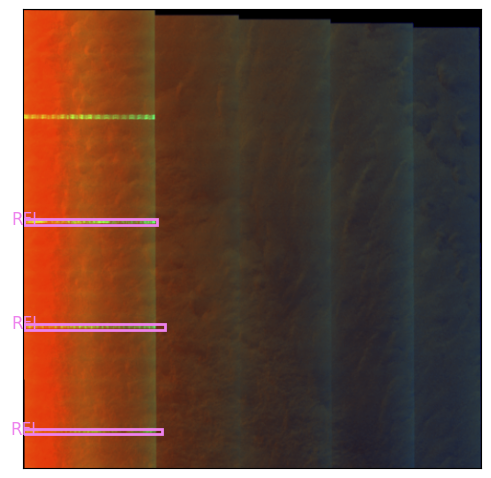

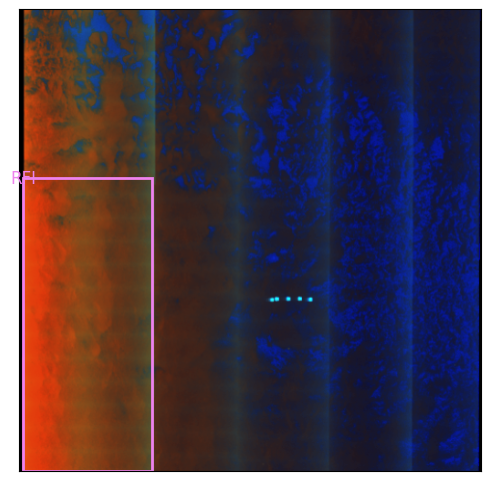

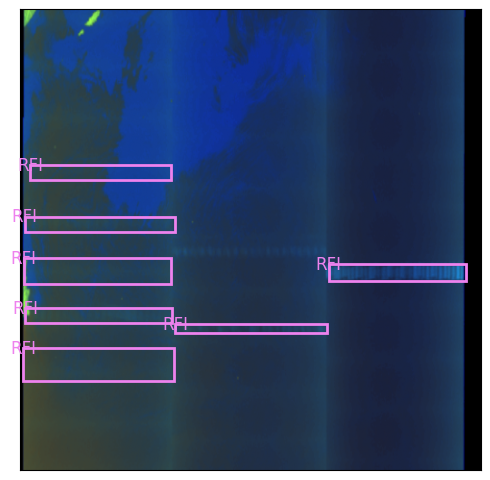

In [26]:
model_config = {
    "num_classes": 2,
    "learning_rate": 0.0001,
    "pretrained": True,
    "metrics": ["map"]
}
model = FasterRCNN(model_config)
model.prepare()

model_path = "/home/dragik/data/rfi/experiments/coco/checkpoint.pth.tar"
labels = ['Other Anomaly','RFI']
transform = Resize()
model.load_model(model_path)

image = image_loader('/home/dragik/data/rfi/testing/images/S1A_EW_GRDM_1SDH_20221207T175401_20221207T175506_046229_05891F_DA92.SAFE.png')
fig = model.detect_objects(image, labels, transform)

image = image_loader('/home/dragik/data/rfi/testing/images/S1A_EW_GRDM_1SDV_20221014T073332_20221014T073432_045435_056EE5_4316.SAFE.png')
fig = model.detect_objects(image, labels, transform)

image = image_loader('/home/dragik/data/rfi/testing/images/S1A_IW_GRDH_1SDV_20230713T044826_20230713T044851_049400_05F0AE_7F17.SAFE.png')
fig = model.detect_objects(image, labels, transform)